# 傅里叶变换

<https://docs.opencv.org/4.x/de/dbc/tutorial_py_fourier_transform.html>

傅里叶变换用于分析各种滤波器的频率特性。更直观的是，对于正弦信号，如果幅度在短时间内变化得这么快，可以说是高频信号。如果变化缓慢，则为低频信号。您可以将同样的想法扩展到图像。图像中的振幅在哪里变化很大？在边缘点，或噪音。因此，我们可以说，边缘和噪声是图像中的高频内容。如果振幅没有太大变化，则为低频分量。

- 二维离散傅立叶变换（DFT）
- 快速傅立叶变换（FFT）

傅里叶变换在图像处理中有以下几个常见的应用：

- 频域滤波：通过将图像转换到频域，可以使用滤波器来增强或抑制特定频率的信息。例如，可以使用低通滤波器来平滑图像并去除高频噪声，或者使用高通滤波器来增强图像的边缘信息。

- 图像去噪：通过在频域中滤除高频噪声，可以减少图像中的噪声。这可以通过将图像转换到频域，将高频噪声设置为零，然后将图像转换回时域来实现。

- 特征提取：傅里叶变换可以帮助提取图像中的频率特征，如纹理、周期性模式等。通过分析频域中的幅度谱和相位谱，可以得到关于图像中不同频率分量的信息。

- 图像压缩：傅里叶变换在图像压缩中起着重要的作用。通过将图像转换到频域，可以利用频域的特性来减少图像的数据量，从而实现图像的压缩。

## Numpy 的傅里叶变换

看，您可以在中心看到更多白色区域显示低频内容更多。所以你找到了频率变换现在你可以在频域中做一些操作，比如高通滤波和重建图像，即找到逆DFT。为此，您只需通过使用大小为 60x60 的矩形窗口遮罩来消除低频。然后使用 np.fft.ifftshift（） 应用反向移位，以便 DC 分量再次出现在左上角。然后使用 np.ifft2（） 函数找到反向 FFT。结果将再次是一个复数。您可以取其绝对值。

结果表明，高通滤波是一种边缘检测操作。这就是我们在图像渐变一章中看到的内容。这也表明，大多数图像数据存在于频谱的低频区域。无论如何，我们已经看到了如何在Numpy中找到DFT，IDFT等。现在让我们看看如何在OpenCV中做到这一点。

如果您仔细观察结果，尤其是最后一张 JET 颜色的图像，您可以看到一些伪影（我用红色箭头标记了一个实例）。它在那里显示出一些类似涟漪的结构，它被称为振铃效应。它是由我们用于遮罩的矩形窗口引起的。此掩码转换为导致此问题的 sinc 形状。所以矩形窗口不用于过滤。更好的选择是高斯Windows。

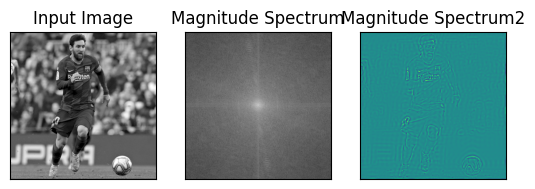

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('messi.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Magnitude Spectrum2'), plt.xticks([]), plt.yticks([])
plt.show()

## OpenCV 中的傅里叶变换

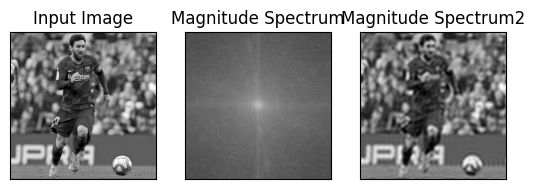

In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('messi.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

rows, cols = img.shape
crow,ccol = rows/2 , cols/2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[int(crow)-30:int(crow)+30, int(ccol)-30:int(ccol)+30] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum2'), plt.xticks([]), plt.yticks([])
plt.show()